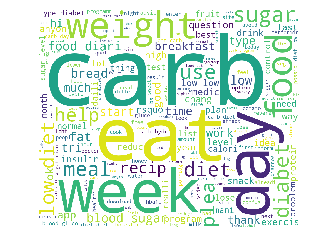

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk import corpus, data, sentiment, sent_tokenize, word_tokenize, RegexpTokenizer, stem, pos_tag
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df = pd.read_csv("C:/Users/DCUK/Desktop/isabelle/Krish/Sentiment analysis/td_questions.csv", usecols=["question", "content"])
df = df.fillna(" ")
df = df.assign(merge=df["question"].astype(str)+ " " + df["content"].astype(str))
df = df["merge"].tolist()
df_str = " ".join(str(i) for i in df)
df_list = df_str.lower().split()

## need to delete puncuation
rt = RegexpTokenizer(r'[^\W_]+|[^\W_\s]+')
rt_df = rt.tokenize(df_str)
## delete stem but will cut "e" in the end
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
df1 = [porter.stem(i.lower()) for i in rt_df if i.lower() not in stop_words]

## delete conjunction e.g. and, or, but, if, while and all determiner e.g. the, a, some, most, every
STOP_TYPES = ['DET', 'CNJ']
df1_str = " ".join(str(i) for i in df1)
tokens = pos_tag(nltk.word_tokenize(df1_str))
good_words = [w for w, wtype in tokens if wtype not in STOP_TYPES]
good_words = [a for a in good_words if a not in stop_words]

## POS tag
good_words_str = " ".join(str(i) for i in good_words)
tokens = word_tokenize(good_words_str)  # Generate list of tokens
tokens_pos = pos_tag(tokens)

nn_word = [(word) for word, tag in tokens_pos if tag.startswith('NN')]
word = nn_word + nn_tagged
#Convert all the required text into a single string here
#and store them in word_string

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(    background_color='white',
                          width=1200,
                          height=1000
                         ).generate(' '.join(word))


plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("nn.png")

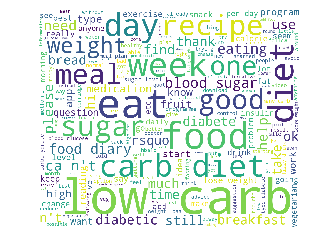

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk import corpus, data, sentiment, sent_tokenize, word_tokenize, RegexpTokenizer, stem, pos_tag
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df = pd.read_csv("C:/Users/DCUK/Desktop/isabelle/Krish/Sentiment analysis/td_questions.csv", usecols=["question", "content"])
df = df.fillna(" ")
df = df.assign(merge=df["question"].astype(str)+ " " + df["content"].astype(str))
df = df["merge"].tolist()
df_str = " ".join(str(i) for i in df)
df_list = df_str.lower().split()
STOP_TYPES = ['DET', 'CNJ']
df1_str = " ".join(str(i) for i in df_list)
tokens = pos_tag(nltk.word_tokenize(df1_str))
good_words = [w for w, wtype in tokens if wtype not in STOP_TYPES]
good_words = [a for a in good_words if a not in stop_words]

wordcloud = WordCloud(    background_color='white',
                          width=1200,
                          height=1000
                         ).generate(' '.join(good_words))


plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("wordcloud.png")